# Week 4 - Univariate Analysis, part 2

# 1. Lesson - None

# 2. Weekly graph question

Below are a histogram and boxplot representation of the same data. A pharmacy is keeping a record of the prices of the drugs that it sells, and an administrator wants to know how much the more expensive drugs tend to cost, in the context of the other prices.

Please write a short explanation of the pros and cons of these two representations. Which would you choose? How would you modify the formatting, if at all, to make it more visually interesting, clear, or informative?

In [1]:
import numpy as np
import pandas as pd

np.random.seed(0)
num_data = 100
data = np.exp(np.random.uniform(size = num_data) * 4)
df = pd.DataFrame(data.T, columns = ["data"])

The 75th percentile is: data    15.457656
Name: 0.75, dtype: float64


<Axes: ylabel='Frequency'>

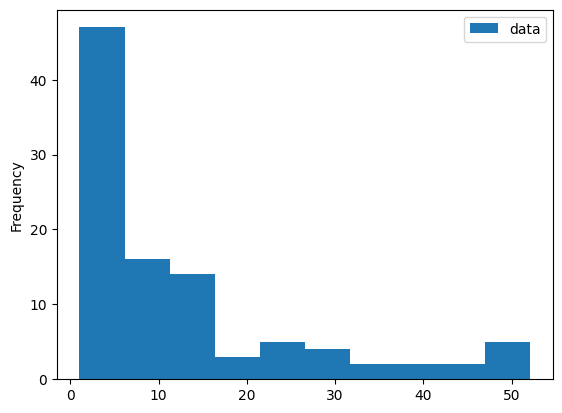

In [2]:
print("The 75th percentile is:", df.quantile(q = 0.75))
df.plot.hist()

Pros:

Shows the overall shape of the distribution, showing that most drug prices are on the lower end, with a long right tail indicating some very expensive drugs. It provides frequency counts, helping identify price ranges where most drugs fall.
Can help visualize outliers, especially if the bins are appropriately chosen.

Cons:

Does not directly indicate summary statistics. The right-skewed nature of the data makes it harder to interpret the exact high-end drug prices.

<Axes: >

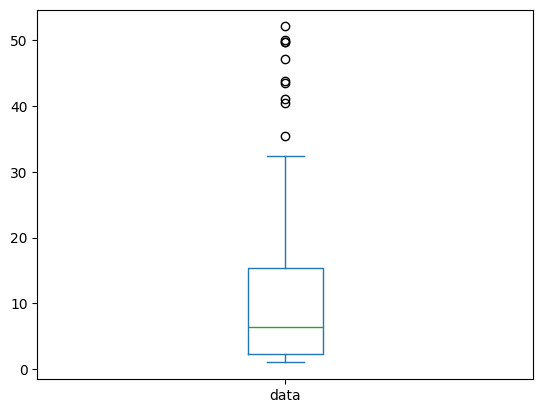

In [3]:
df.plot.box()

Pros:

- Clearly highlights outliers, which represent the most expensive drugs.
- Provides a compact summary of price distribution, including median, quartiles, and overall spread.

Cons:

- Doesn't show frequency or density within different price ranges.
- Lacks insight into the shape of the distribution

I would recommend the boxplot because it explicitly shows outliers, which are crucial for understanding the higher-end drug prices.
It provides a clear percentile breakdown, especially the 75th percentile.

##### Formatting Improvements:

Histogram:

- I would use logarithmic bins since the data is exponential, making the distribution more interpretable.
- Adjust bin size to ensure a smooth and informative visualization.
- Label axes clearly, e.g., “Price (log scale)” vs. “Frequency.”

Boxplot:
- Add annotations for key percentiles to improve readability.

# 3. Homework - working on your datasets

This week, you will do the same types of exercises as last week, but you should use your own datasets that you found last semester.

### Here are some types of analysis you can do:

- Draw histograms and histogram variants for each feature or column.  (Swarm plot, kde plot, violin plot).

- Draw grouped histograms.  For instance, if you have tree heights for both maple and oak trees, you could draw histograms for both.

- Draw a bar plot to indicate total counts of each categorical variable in a given column.

- Find means, medians, and modes.

### Conclusions:

- Explain what conclusions you would draw from this analysis: are the data what you expect?  Are the data likely to be usable?  If they are not useable, find some new data!

- What is the overall shape of the distribution?  Is it normal, skewed, bimodal, uniform, etc.?

- Are there any outliers present?  (Data points that are far from the others.)

- If there are multiple related histograms, how does the distribution change across different groups?

- What are the minimum and maximum values represented in each histogram?

- How do bin sizes affect the histogram?  Does changing the bin width reveal different patterns in the data?

- Does the distribution appear normal, or does it have a different distribution?

In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

ren_energy = pd.read_csv("IRENA_RenewableEnergy_Statistics_2000-2022.csv", encoding='latin-1')

# Check the basic information of the dataset
print(ren_energy.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35193 entries, 0 to 35192
Data columns (total 12 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Region                               35193 non-null  object 
 1   Sub-region                           35193 non-null  object 
 2   Country                              35193 non-null  object 
 3   ISO3 code                            35193 non-null  object 
 4   M49 code                             35193 non-null  int64  
 5   RE or Non-RE                         35193 non-null  object 
 6   Group Technology                     35193 non-null  object 
 7   Technology                           35193 non-null  object 
 8   Producer Type                        35193 non-null  object 
 9   Year                                 35193 non-null  int64  
 10  Electricity Generation (GWh)         35193 non-null  float64
 11  Electricity Installed Capaci

In [5]:
print(ren_energy.head())

   Region       Sub-region  Country ISO3 code  M49 code         RE or Non-RE  \
0  Africa  Northern Africa  Algeria       DZA        12  Total Non-Renewable   
1  Africa  Northern Africa  Algeria       DZA        12  Total Non-Renewable   
2  Africa  Northern Africa  Algeria       DZA        12  Total Non-Renewable   
3  Africa  Northern Africa  Algeria       DZA        12  Total Non-Renewable   
4  Africa  Northern Africa  Algeria       DZA        12  Total Non-Renewable   

  Group Technology   Technology        Producer Type  Year  \
0     Fossil fuels  Natural gas  On-grid electricity  2000   
1     Fossil fuels  Natural gas  On-grid electricity  2001   
2     Fossil fuels  Natural gas  On-grid electricity  2002   
3     Fossil fuels  Natural gas  On-grid electricity  2003   
4     Fossil fuels  Natural gas  On-grid electricity  2004   

   Electricity Generation (GWh)  Electricity Installed Capacity (MW)  
0                       24585.0                              5459.01  
1   

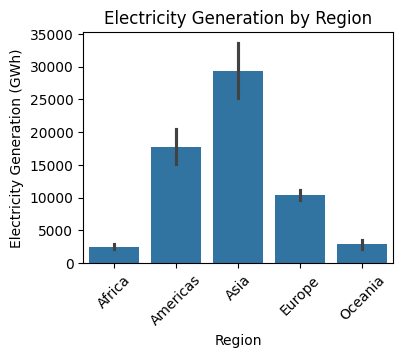

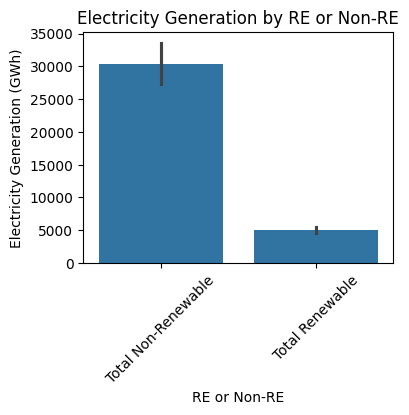

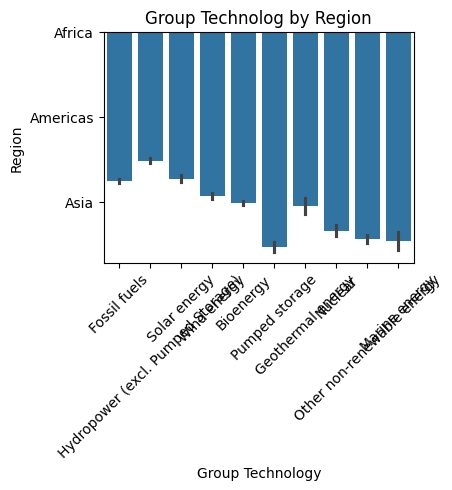

In [21]:

# Bar plot for Electricity Generation by Region
plt.figure(figsize=(4,3))
sns.barplot(data=ren_energy, x='Region', y='Electricity Generation (GWh)')
plt.title('Electricity Generation by Region')
plt.xticks(rotation=45)
plt.show()

# Bar plot for Electricity Generation by Energy Type
plt.figure(figsize=(4, 3))
sns.barplot(data=ren_energy, x='RE or Non-RE', y='Electricity Generation (GWh)')
plt.title('Electricity Generation by RE or Non-RE')
plt.xticks(rotation=45)
plt.show()

# Bar plot for Electricity Generation by Energy Type
plt.figure(figsize=(4, 3))
sns.barplot(data=ren_energy, x='Group Technology', y='Region')
plt.title('Group Technolog by Region')
plt.xticks(rotation=45)
plt.show()


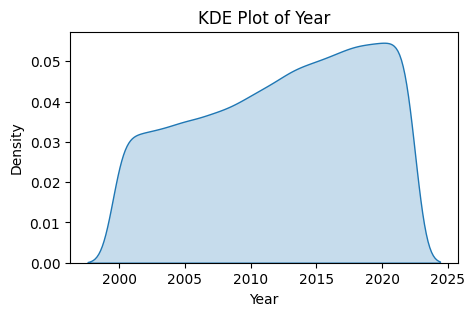

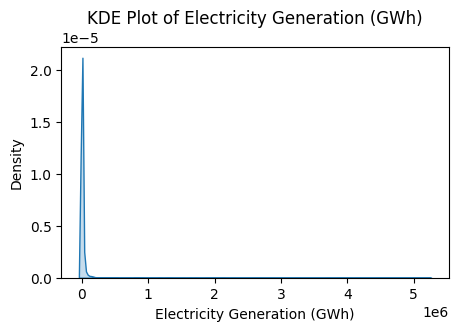

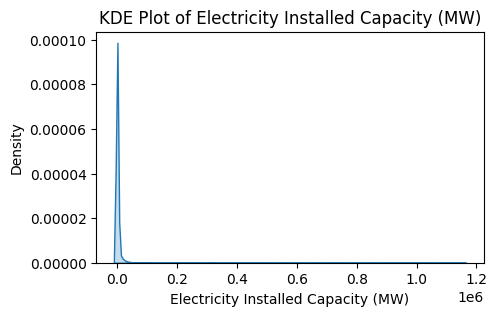

In [ ]:
# Selecting numerical columns
num_ren_energy = ren_energy[['Year', 'Electricity Generation (GWh)', 'Electricity Installed Capacity (MW)']]

# Loop for creating KDE plots
for col in num_ren_energy:
    plt.figure(figsize=(5, 3))
    sns.kdeplot(num_ren_energy[col].dropna(), fill=True) 
    plt.title(f"KDE Plot of {col}")
    plt.xlabel(col)
    plt.ylabel('Density')
    plt.show()

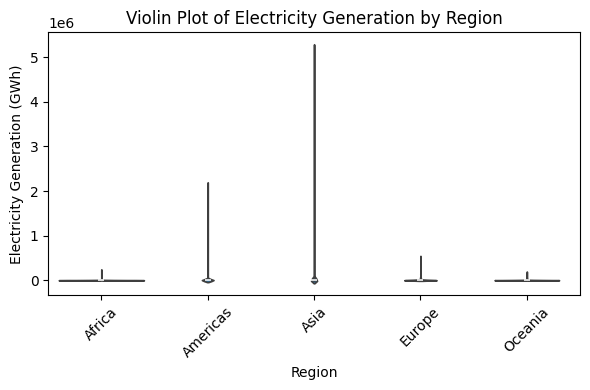

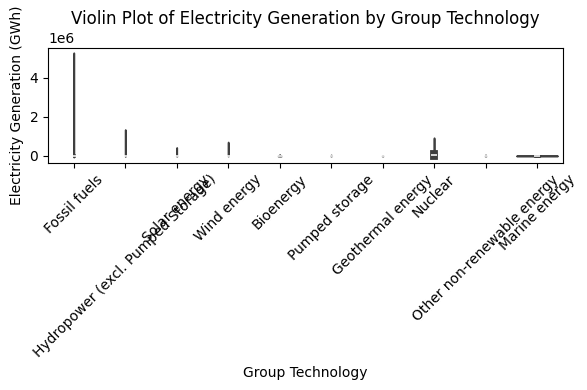

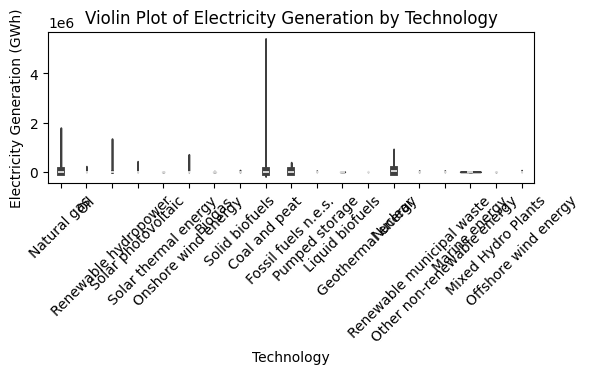

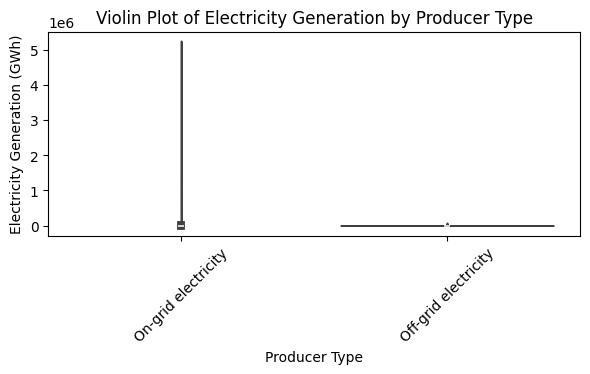

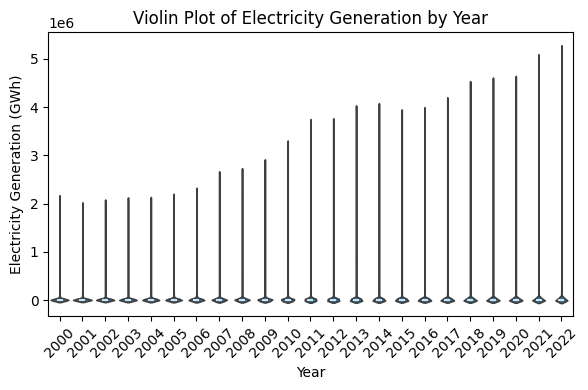

In [32]:
# Selecting categorical columns
important_categorical = ren_energy[['Region', 'Group Technology', 'Technology', 'Producer Type', "Year"]]

# Loop to create violin plots
for col in important_categorical:
    plt.figure(figsize=(6, 4))
    sns.violinplot(x=ren_energy[col], y=ren_energy["Electricity Generation (GWh)"]) 
    plt.xticks(rotation=45)
    plt.title(f"Violin Plot of Electricity Generation by {col}")
    plt.xlabel(col)
    plt.ylabel('Electricity Generation (GWh)')
    plt.tight_layout()
    plt.show()

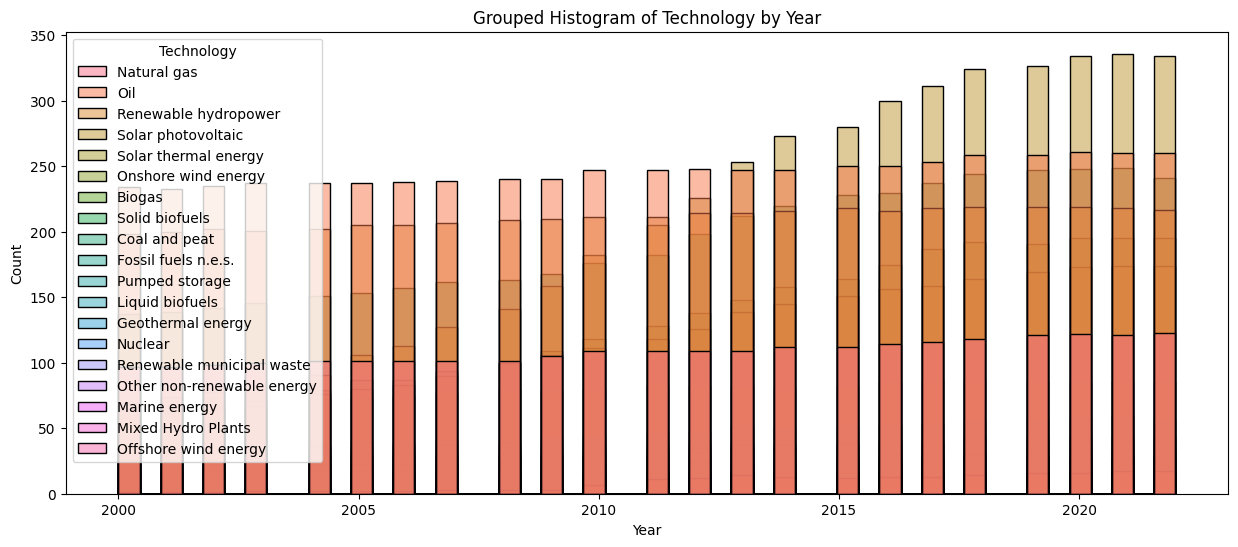

In [38]:
## Selecting categorical columns
important_categorical = ren_energy[['Region', 'Group Technology', 'Technology', 'Producer Type', 'Year']]


#  Grouped Histogramsof Latest Price by Home Type
plt.figure(figsize=(15, 6))
sns.histplot(data=important_categorical , x="Year", hue="Technology", bins=50, fill=True)
plt.title("Grouped Histogram of Technology by Year")
plt.show()

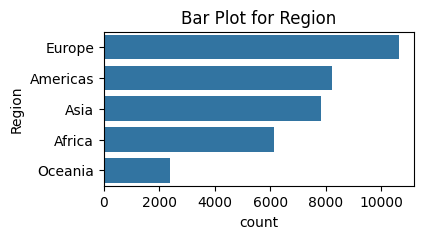

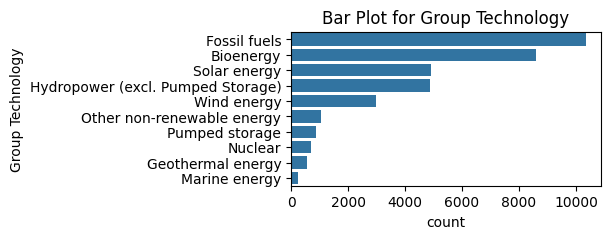

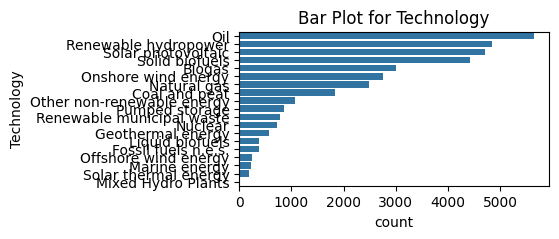

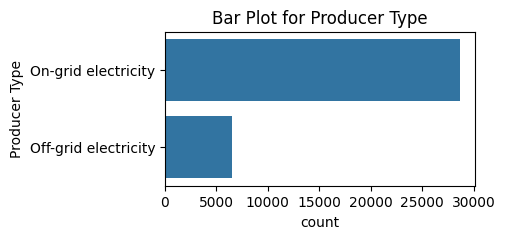

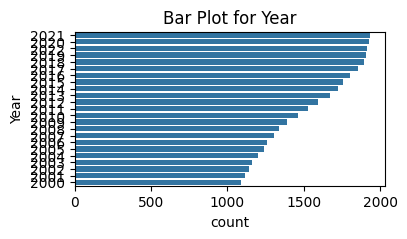

In [39]:
for col in important_categorical:
    plt.figure(figsize=(4, 2))
    sns.countplot(y=important_categorical[col], order=important_categorical[col].value_counts().index)
    plt.title(f"Bar Plot for {col}")
    plt.show()

In [45]:
num_ren_energy = ren_energy[['Electricity Generation (GWh)', 'Electricity Installed Capacity (MW)']]

# Mean
mean_values = num_ren_energy.mean()

#Median 
median_values = num_ren_energy.median()

mode_values = num_ren_energy.mode().iloc[0]

print("Mean values:\n", mean_values)
print("Median values:\n", median_values)
print("Mode values:\n", mode_values)

Mean values:
 Electricity Generation (GWh)           14409.294485
Electricity Installed Capacity (MW)     3452.454505
dtype: float64
Median values:
 Electricity Generation (GWh)           200.257
Electricity Installed Capacity (MW)     58.900
dtype: float64
Mode values:
 Electricity Generation (GWh)           1.0
Electricity Installed Capacity (MW)    2.0
Name: 0, dtype: float64


#### Data Usability & Expectations
The dataset includes a mix of numerical and categorical features. The histograms suggest that certain region and type of energy (non-renewable) are more frequent. Asia leading the charge in electricity generation.

#### Overall Shape of the Distributions
The KDE plot shows peak density around 2.3 on electricity generation.

#### Violin plots 
These plots reveal that mostly non-renewable energy generation increased over the years and mostly in Asia and America.  

#### Bar plots 
The plots reveals that renewable energy such as solar production slowly gaining traction

# 4. Storytelling With Data graph

Reproduce any graph of your choice in p. 52-68 of the Storytelling With Data book as best you can.  (The second half of chapter two).  You do not have to get the exact data values right, just the overall look and feel.

In [ ]:
# Multiple series bar chart of school-related categories grouped by zipcode from Storytelling With Data book 

ren_energy_categorical = ren_energy[['Region', 'Group Technology', 'Producer Type']]
year = ren_energy['Year']

x = np.arange(len(year))
width = 0.2  # Bar width

fig, ax = plt.subplots(figsize=(12, 6))

# Plot bars for each school type
for i, category in enumerate(ren_energy_categorical ):
    ax.bar(x + i * width, df.groupby("Year")[category].mean(), width, label=category)

ax.set_xlabel("Year")
ax.set_ylabel("Energy Production")
ax.set_title("Energy Production over the Years")
ax.set_xticks(x + width * 1.5)
ax.set_xticklabels(year, rotation=45)
ax.legend()

plt.show()